In [199]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
import fsspec
from matplotlib import pyplot
from matplotlib import colormaps
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from metpy.plots import USCOUNTIES
import numpy
import pandas
from PIL import Image
import pyart
import random
import xarray as xr

In [195]:
# List Files
FS = fsspec.filesystem("s3", anon=True)
Files_KAMX = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/06/KAMX/KAMX20161006_18*"))
Files_KMLB = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/07/KMLB/KMLB20161007_07*"))
Files_KJAX = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/07/KJAX/KJAX20161007_22*"))
Files_KCLX = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/08/KCLX/KCLX20161008_08*"))
Files_KLTX = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_21*"))
Files_KMHX = sorted(FS.glob("s3://noaa-nexrad-level2/2016/10/09/KMHX/KMHX20161009_03*"))
Files_KLTX

['noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_210232_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_210856_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_211518_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_212141_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_212804_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_213459_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_214150_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_214844_V06',
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_215539_V06']

In [196]:
# Create Files List
Files_List = \
['noaa-nexrad-level2/2016/10/06/KAMX/KAMX20161006_181237_V06', \
 'noaa-nexrad-level2/2016/10/07/KMLB/KMLB20161007_072855_V06', \
 'noaa-nexrad-level2/2016/10/07/KJAX/KJAX20161007_220858_V06', \
 'noaa-nexrad-level2/2016/10/08/KCLX/KCLX20161008_080718_V06', \
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_211518_V06', \
 'noaa-nexrad-level2/2016/10/09/KMHX/KMHX20161009_031639_V06']

In [198]:
# Read Radar
Radar_KAMX = pyart.io.read_nexrad_archive(f's3://{Files_List[0]}')
Radar_KMLB = pyart.io.read_nexrad_archive(f's3://{Files_List[1]}')
Radar_KJAX = pyart.io.read_nexrad_archive(f's3://{Files_List[2]}')
Radar_KCLX = pyart.io.read_nexrad_archive(f's3://{Files_List[3]}')
Radar_KLTX = pyart.io.read_nexrad_archive(f's3://{Files_List[4]}')
Radar_KMHX = pyart.io.read_nexrad_archive(f's3://{Files_List[5]}')

In [204]:
# Create Function to Plot Radar Reflectivity
def Plot_Reflectivity(Ax, Radar):
# Plot Reflectivity
    Display = pyart.graph.RadarMapDisplay(Radar)
    Display.plot_ppi_map('reflectivity', sweep=0, vmin=-10, vmax=70, ax=Ax)
# Set xlim and ylim
#    pyplot.xlim(-97.7,-97.1)
#    pyplot.ylim(35.2,35.8)
# Add Gridlines
    Gridlines = Axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, \
    linewidth=0.3, color='silver', linestyle='-')
# Labels Only Left and Bottom
    Gridlines.top_labels = False
    Gridlines.right_labels = False
# Set Gridline Labels Fontsize
    Gridlines.xlabel_style = {'fontsize':10}
    Gridlines.ylabel_style = {'fontsize':10}
# Add Counties

In [207]:
# Produce Radar Imageries
def Radar_Imagery(Radar_KAMX, Radar_KMLB, Radar_KJAX, Radar_KCLX, Radar_KLTX, Radar_KMHX):
    Fig = pyplot.figure(figsize=[12,18])
# KAMX
    Ax1 = pyplot.subplot(3,2,1, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax1, Radar_KAMX)
# KMLB
    Ax2 = pyplot.subplot(3,2,2, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax2, Radar_KMLB)
# KJAX
    Ax3 = pyplot.subplot(3,2,3, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax3, Radar_KJAX)
# KCLX
    Ax4 = pyplot.subplot(3,2,4, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax4, Radar_KCLX)
# KLTX
    Ax5 = pyplot.subplot(3,2,5, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax5, Radar_KLTX)
# KMHX
    Ax6 = pyplot.subplot(3,2,6, projection=ccrs.PlateCarree())
    Plot_Reflectivity(Ax6, Radar_KMHX)

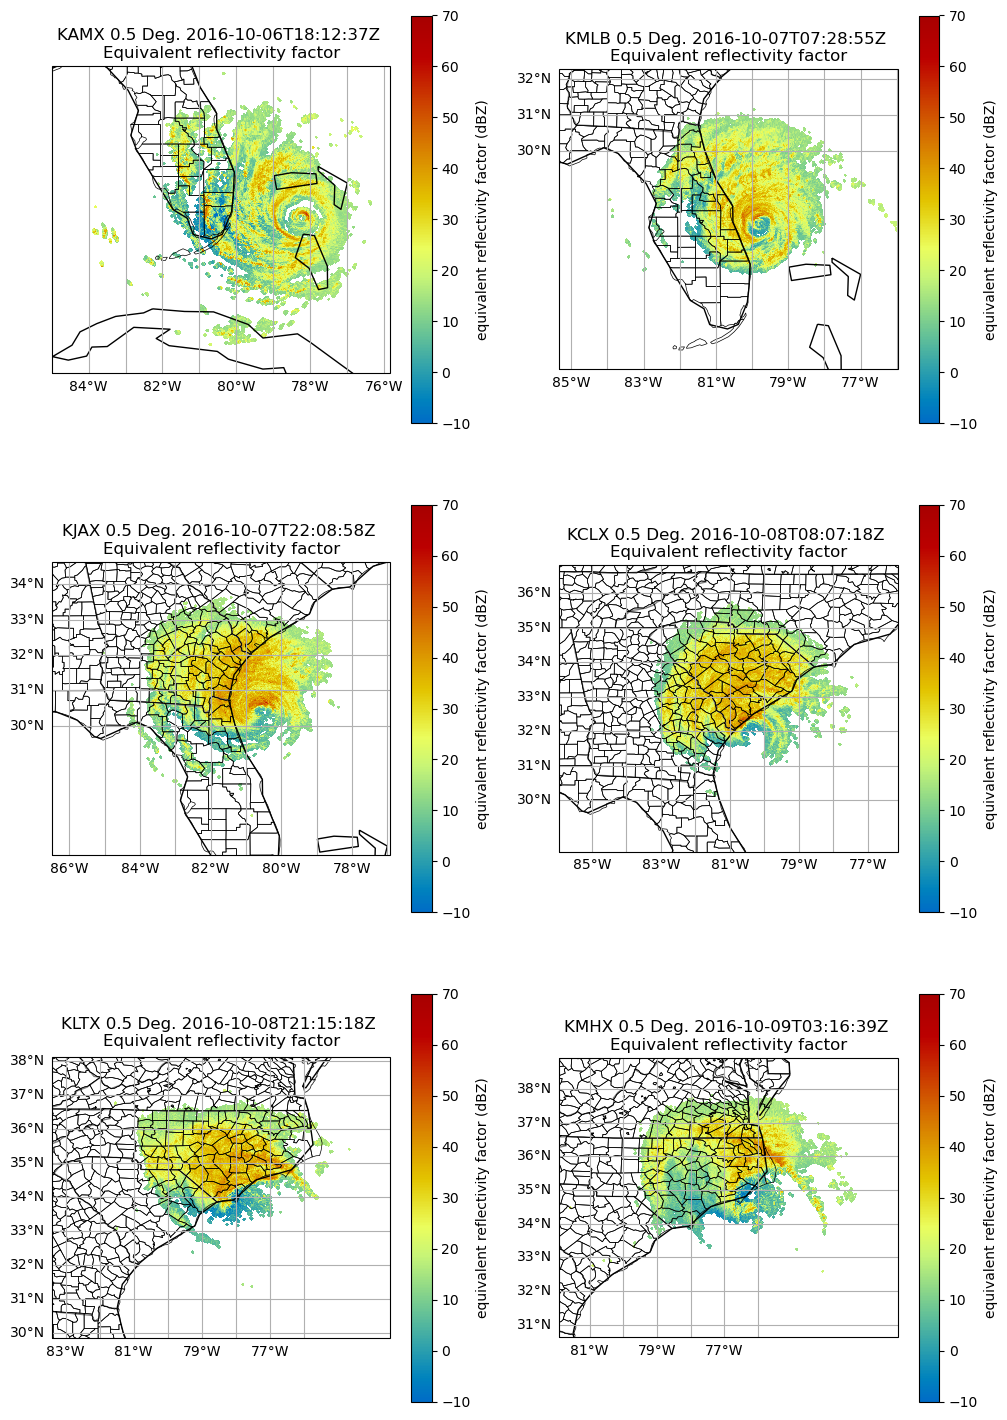

In [208]:
Radar_Imagery(Radar_KAMX, Radar_KMLB, Radar_KJAX, Radar_KCLX, Radar_KLTX, Radar_KMHX)

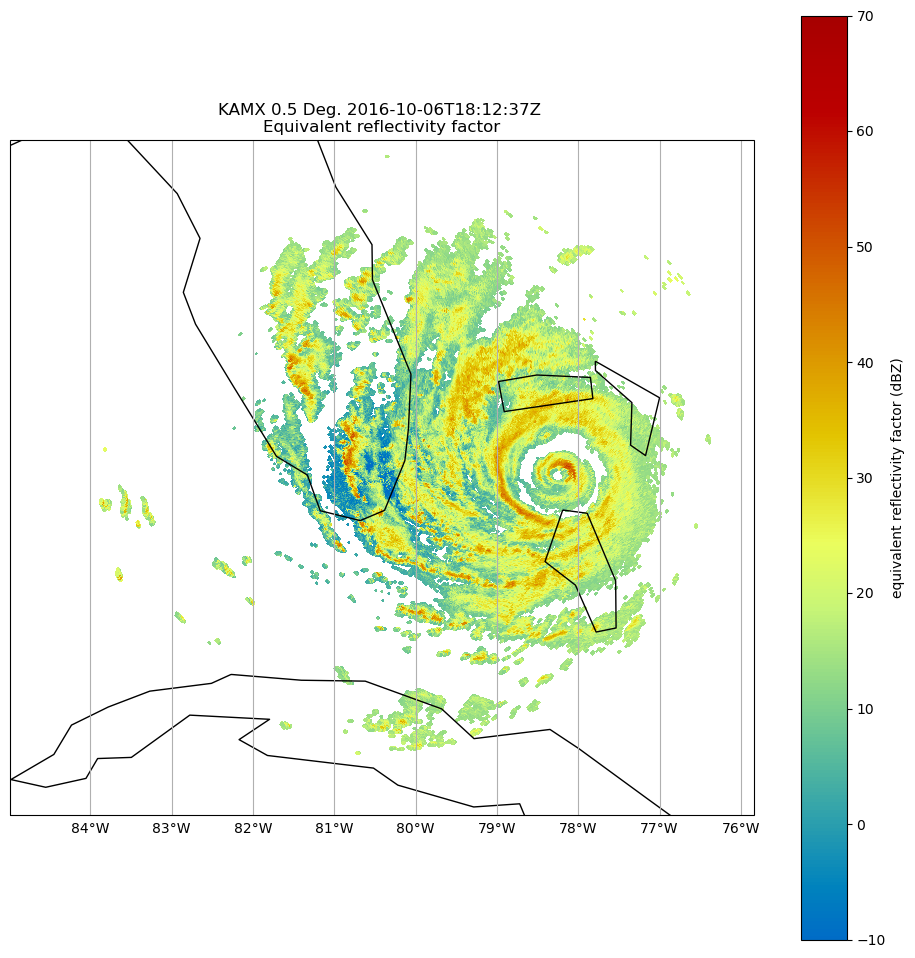

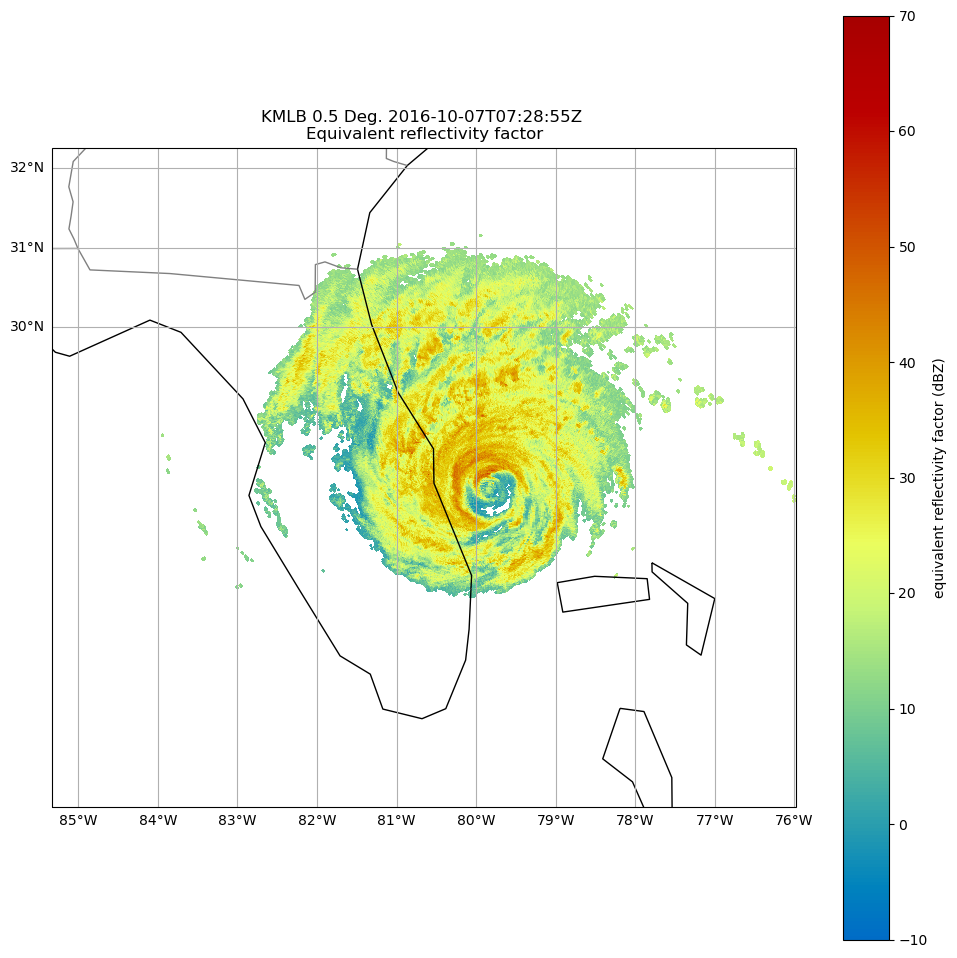

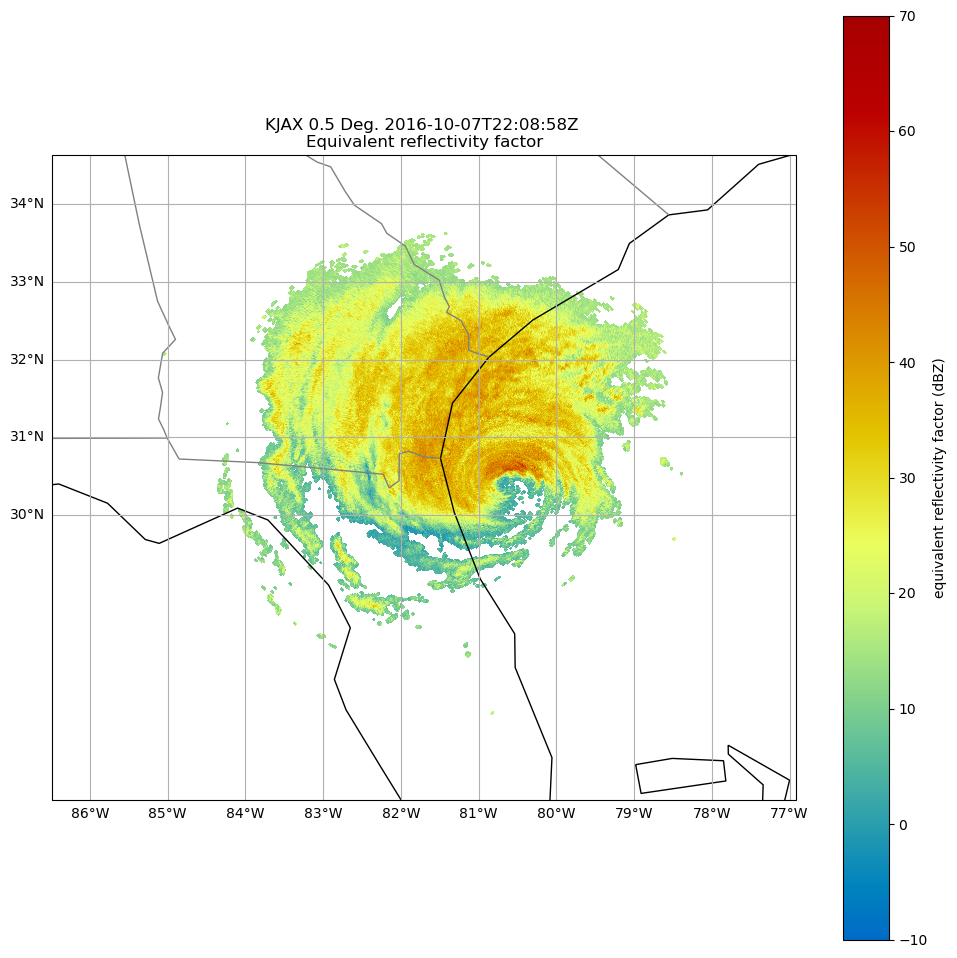

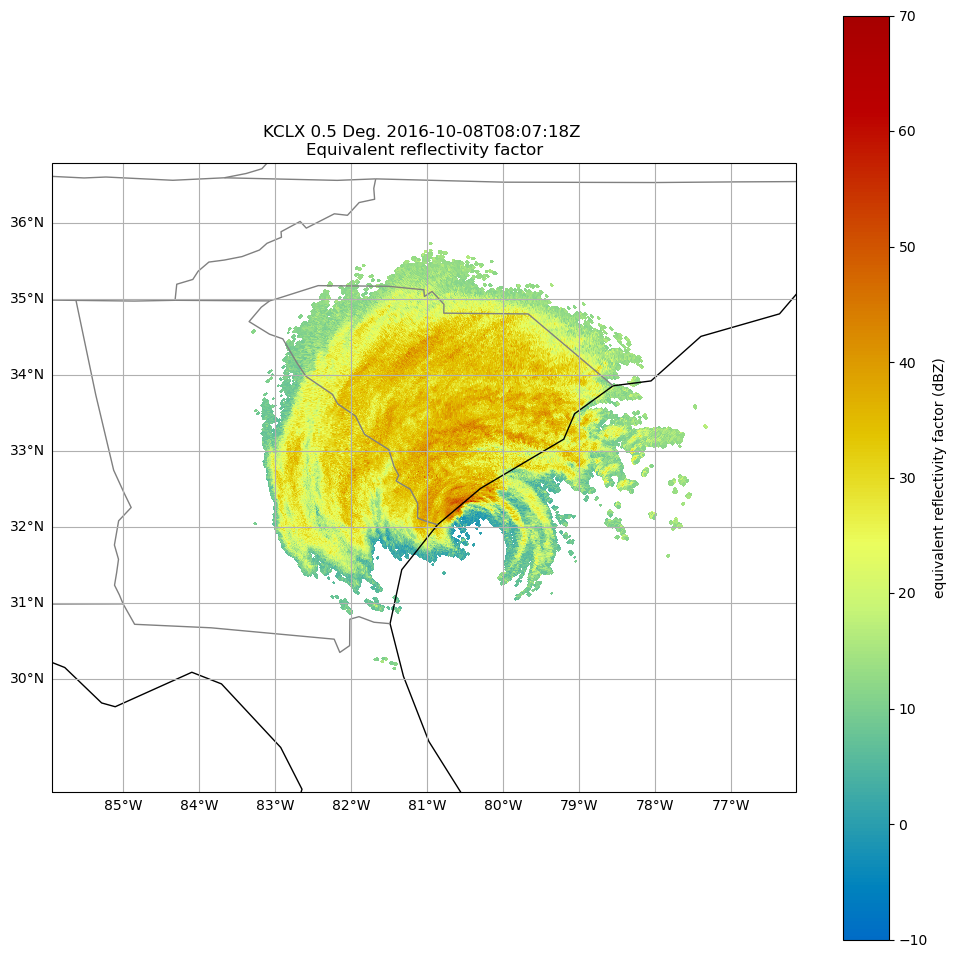

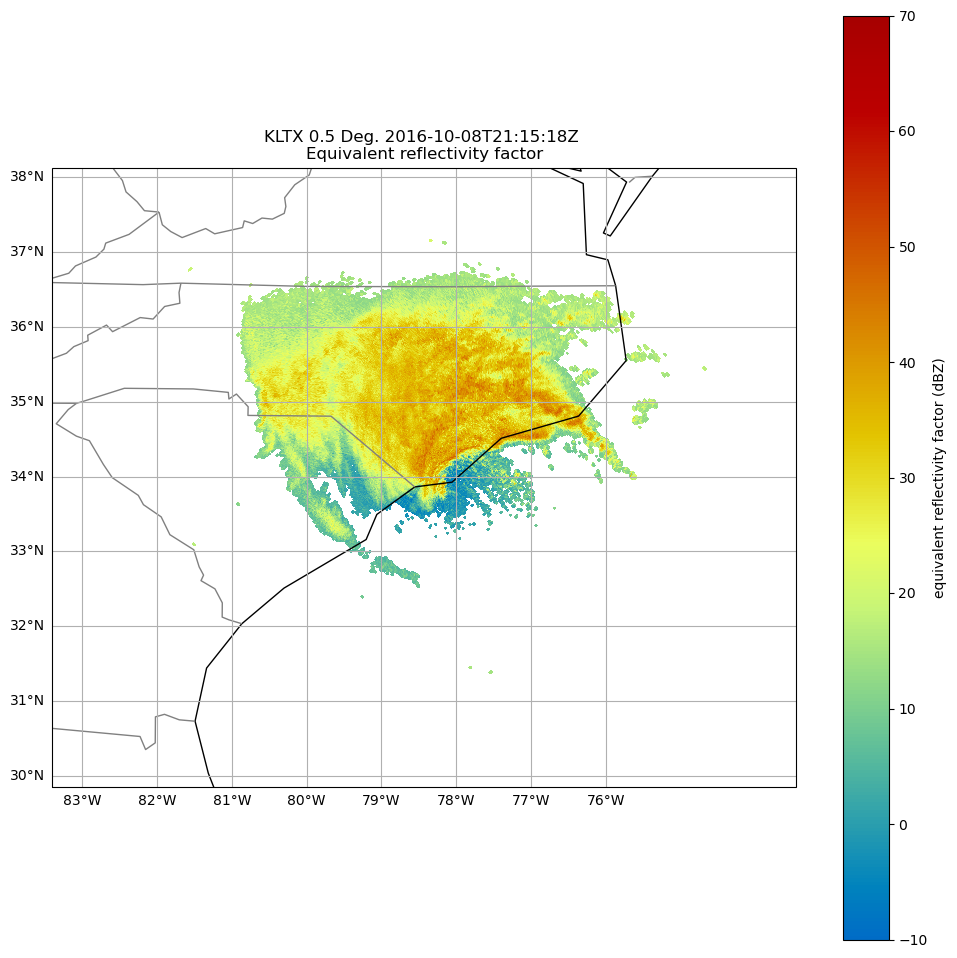

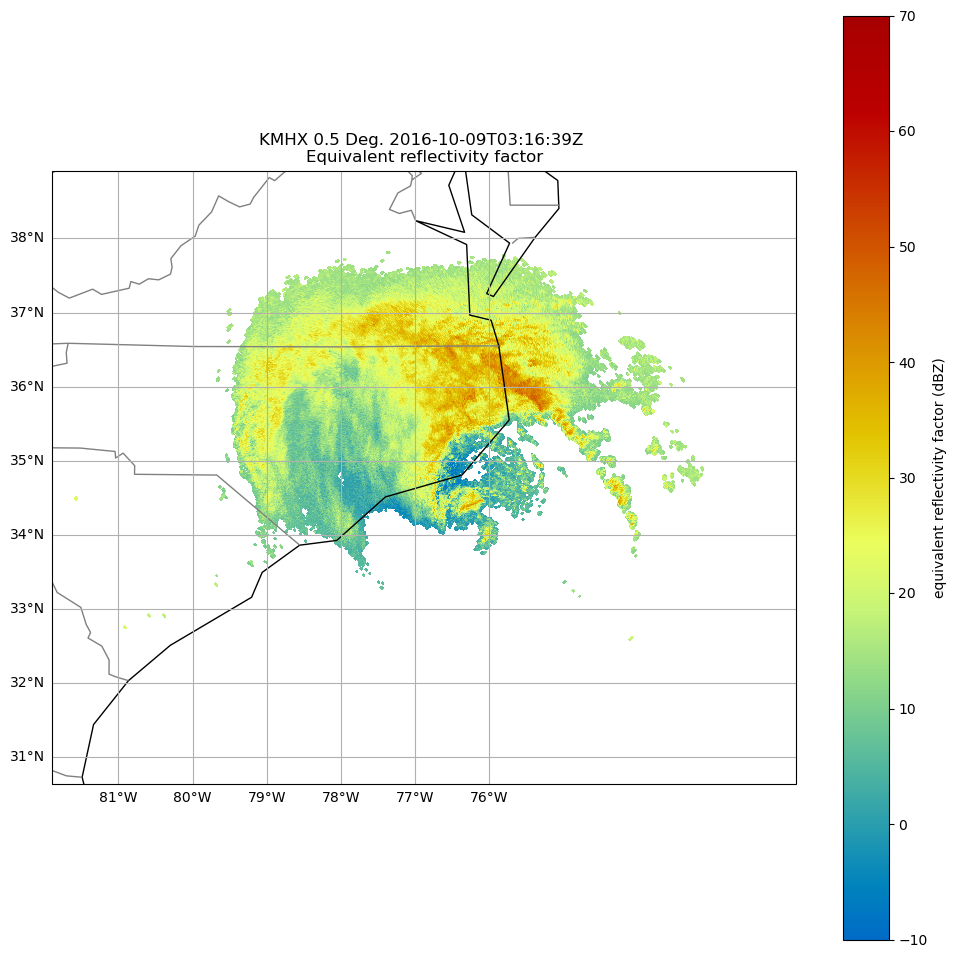

In [197]:
# Open Radar
for i in range(len(Files_List)):
    Radar = pyart.io.read_nexrad_archive(f's3://{Files_List[i]}')
#
# Plot Reflectivity
    Fig = pyplot.figure(figsize=[12,12])
#    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#    Axis.coastlines(linewidth=0.5)
#    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
#    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    Display = pyart.graph.RadarMapDisplay(Radar)
    Display.plot_ppi_map('reflectivity', sweep=0, vmin=-10, vmax=70,\
    projection=ccrs.PlateCarree())